# Load the dataframe

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("d/TG_STAID000001.txt", skiprows=20, parse_dates=["    DATE"])

In [3]:
df

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9
59470,1,35381,2022-10-28,-9999,9
59471,1,35381,2022-10-29,-9999,9
59472,1,35381,2022-10-30,-9999,9


# Show certain rows

In [4]:
df[10:20]

,STAID,SOUID,DATE,TG,Q_TG
10,1,35381,1860-01-11,-5,1
11,1,35381,1860-01-12,-18,1
12,1,35381,1860-01-13,-27,1
13,1,35381,1860-01-14,-26,1
14,1,35381,1860-01-15,-37,1
15,1,35381,1860-01-16,-9,1
16,1,35381,1860-01-17,7,1
17,1,35381,1860-01-18,-6,1
18,1,35381,1860-01-19,-16,1
19,1,35381,1860-01-20,-19,1


# Show certain Columns

In [5]:
df.columns

Index(['STAID', ' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [6]:
df['   TG']

0          21
1          46
2          31
3          37
4          31
         ... 
59469   -9999
59470   -9999
59471   -9999
59472   -9999
59473   -9999
Name:    TG, Length: 59474, dtype: int64

In [7]:
df[['    DATE', '   TG']]

,DATE,TG
0,1860-01-01,21
1,1860-01-02,46
2,1860-01-03,31
3,1860-01-04,37
4,1860-01-05,31
...,...,...
59469,2022-10-27,-9999
59470,2022-10-28,-9999
59471,2022-10-29,-9999
59472,2022-10-30,-9999


# Simple statistics and filtering

In [9]:
df.loc[df['   TG'] != -9999]

,STAID,SOUID,DATE,TG,Q_TG
0,1,35381,1860-01-01,21,1
1,1,35381,1860-01-02,46,1
2,1,35381,1860-01-03,31,1
3,1,35381,1860-01-04,37,1
4,1,35381,1860-01-05,31,1
...,...,...,...,...,...
53655,1,35381,2006-11-26,80,0
53656,1,35381,2006-11-27,70,0
53657,1,35381,2006-11-28,71,0
53658,1,35381,2006-11-29,63,0


In [10]:
df.loc[df['   TG'] != -9999]['   TG']

0        21
1        46
2        31
3        37
4        31
         ..
53655    80
53656    70
53657    71
53658    63
53659    84
Name:    TG, Length: 53103, dtype: int64

In [12]:
df.loc[df['   TG'] != -9999]['   TG'].mean() / 10

np.float64(6.360787526128467)

In [13]:
df.loc[df['   TG'] != -9999]['   TG'].max() / 10

np.float64(26.2)

In [14]:
df.loc[df['   TG'] != -9999]['   TG'].min() / 10

np.float64(-28.8)

<Axes: >

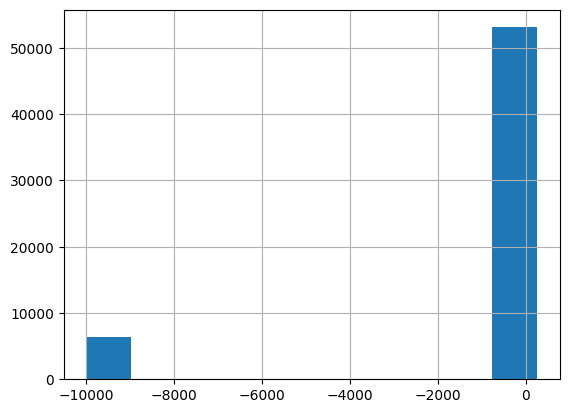

In [15]:
df['   TG'].hist()

<Axes: >

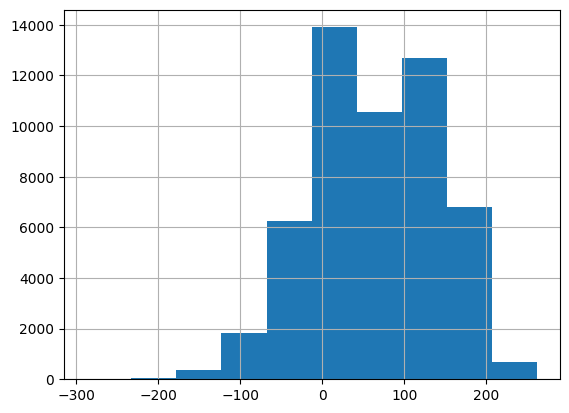

In [16]:
df.loc[df['   TG'] != -9999]['   TG'].hist()

# Get certain cells

In [17]:
df.loc[df['    DATE'] == "1860-01-05"]

,STAID,SOUID,DATE,TG,Q_TG
4,1,35381,1860-01-05,31,1


In [20]:
df.loc[df['    DATE'] == "1860-01-05"]['   TG'].squeeze() / 10

np.float64(3.1)

In [22]:
df.loc[df['   TG'] == df['   TG'].max()]

,STAID,SOUID,DATE,TG,Q_TG
3150,1,35381,1868-08-16,262,1


In [24]:
df.loc[df['   TG'] == df['   TG'].max()]['    DATE'].squeeze()

Timestamp('1868-08-16 00:00:00')

In [25]:
df.loc[3, '   TG']

np.int64(37)

# Calculate a new column out of existing column

In [32]:
import numpy as np
df["TG0"] = df['   TG'].mask(df['   TG'] == -9999, np.nan)
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,1,2.1,35.78,21.0
1,1,35381,1860-01-02,46,1,4.6,40.28,46.0
2,1,35381,1860-01-03,31,1,3.1,37.58,31.0
3,1,35381,1860-01-04,37,1,3.7,38.66,37.0
4,1,35381,1860-01-05,31,1,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,-999.9,-1767.82,NaN
59470,1,35381,2022-10-28,-9999,9,-999.9,-1767.82,NaN
59471,1,35381,2022-10-29,-9999,9,-999.9,-1767.82,NaN
59472,1,35381,2022-10-30,-9999,9,-999.9,-1767.82,NaN


In [33]:
df["TG"] = df["TG0"] / 10

In [34]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,1,2.1,35.78,21.0
1,1,35381,1860-01-02,46,1,4.6,40.28,46.0
2,1,35381,1860-01-03,31,1,3.1,37.58,31.0
3,1,35381,1860-01-04,37,1,3.7,38.66,37.0
4,1,35381,1860-01-05,31,1,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN,-1767.82,NaN
59470,1,35381,2022-10-28,-9999,9,NaN,-1767.82,NaN
59471,1,35381,2022-10-29,-9999,9,NaN,-1767.82,NaN
59472,1,35381,2022-10-30,-9999,9,NaN,-1767.82,NaN


In [35]:
df["Fahrenheit"] = df["TG"] * (9/5) + 32

In [36]:
df

,STAID,SOUID,DATE,TG,Q_TG,TG,Fahrenheit,TG0
0,1,35381,1860-01-01,21,1,2.1,35.78,21.0
1,1,35381,1860-01-02,46,1,4.6,40.28,46.0
2,1,35381,1860-01-03,31,1,3.1,37.58,31.0
3,1,35381,1860-01-04,37,1,3.7,38.66,37.0
4,1,35381,1860-01-05,31,1,3.1,37.58,31.0
...,...,...,...,...,...,...,...,...
59469,1,35381,2022-10-27,-9999,9,NaN,NaN,NaN
59470,1,35381,2022-10-28,-9999,9,NaN,NaN,NaN
59471,1,35381,2022-10-29,-9999,9,NaN,NaN,NaN
59472,1,35381,2022-10-30,-9999,9,NaN,NaN,NaN


# Plotting

<Axes: >

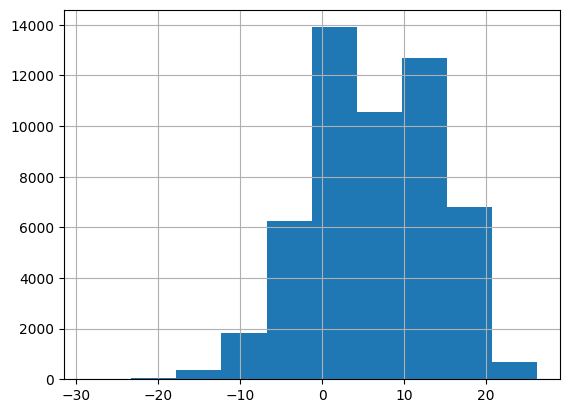

In [38]:
df["TG"].hist()

<Axes: xlabel='    DATE'>

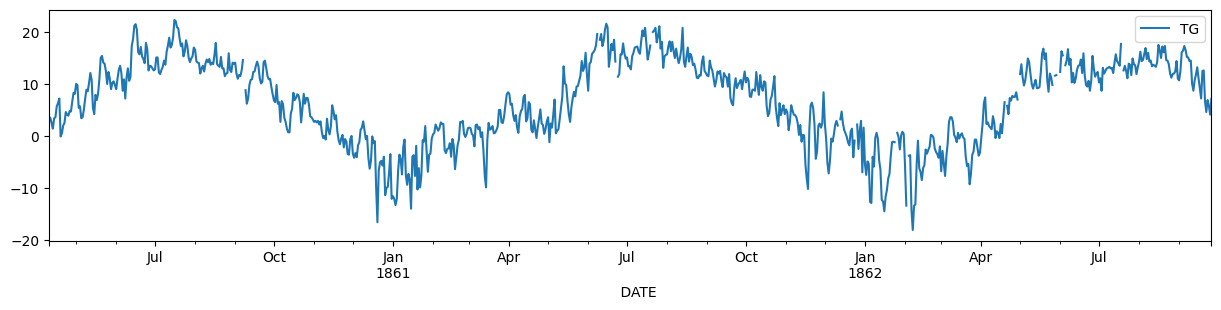

In [40]:
df[100:1000].plot(x='    DATE', y="TG", figsize=(15, 3))